In [1]:
#!pip install Cython
#! conda install -c https://conda.binstar.org/statsmodels statsmodels


Update statsmodel by using 
conda install -c conda-forge statsmodels



#!pip install -U statsmodels
Credits- http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
    and http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
dir(sm)

['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MICE',
 'MICEData',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PCA',
 'PHReg',
 'Poisson',
 'ProbPlot',
 'Probit',
 'QuantReg',
 'RLM',
 'RecursiveLS',
 'SurvfuncRight',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_constant',
 'categorical',
 'cov_struct',
 'datasets',
 'distributions',
 'duration',
 'emplike',
 'families',
 'formula',
 'genmod',
 'graphics',
 'iolib',
 'load',
 'nonparametric',
 'qqline',
 'qqplot',
 'qqplot_2samples',
 'regression',
 'robust',
 'show_versions',
 'stats',
 'test',
 'tools',
 'tsa',
 'version',
 'webdoc']

In [4]:
dir(sm.tsa)

['AR',
 'ARIMA',
 'ARMA',
 'ArmaProcess',
 'DynamicFactor',
 'DynamicVAR',
 'MarkovAutoregression',
 'MarkovRegression',
 'SARIMAX',
 'SVAR',
 'UnobservedComponents',
 'VAR',
 'VARMAX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acf',
 'acovf',
 'add_lag',
 'add_trend',
 'adfuller',
 'arma_generate_sample',
 'arma_order_select_ic',
 'bds',
 'ccf',
 'ccovf',
 'coint',
 'datetools',
 'detrend',
 'filters',
 'graphics',
 'interp',
 'kpss',
 'lagmat',
 'lagmat2ds',
 'pacf',
 'pacf_ols',
 'pacf_yw',
 'periodogram',
 'q_stat',
 'seasonal_decompose',
 'statespace',
 'stattools',
 'tsatools',
 'var',
 'x13_arima_analysis',
 'x13_arima_select_order']

In [5]:
dir(sm.tsa.ARIMA)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit_start_params',
 '_fit_start_params_hr',
 '_get_dates_loc',
 '_get_exog_names',
 '_get_init_kwds',
 '_get_predict_end',
 '_get_predict_start',
 '_handle_data',
 '_init_dates',
 '_invtransparams',
 '_make_predict_dates',
 '_set_exog_names',
 '_set_predict_start_date',
 '_str_to_date',
 '_transparams',
 'endog_names',
 'exog_names',
 'fit',
 'from_formula',
 'geterrors',
 'hessian',
 'information',
 'initialize',
 'loglike',
 'loglike_css',
 'loglike_kalman',
 'predict',
 'score']

In [6]:
# Source data https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
df=pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/AirPassengers.csv")

In [7]:
df=df.drop('Unnamed: 0',1)

In [8]:
df.head()

,time,AirPassengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [9]:
df.tail()

,time,AirPassengers
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [10]:
df.shape

(144, 2)

In [11]:
df.shape[0]

144

In [12]:
start = datetime.datetime.strptime("1949-01-01", "%Y-%m-%d")
print(start)

1949-01-01 00:00:00


In [13]:
date_list = [start + relativedelta(months=x) for x in range(0,df.shape[0])]
print(date_list[0:4])

[datetime.datetime(1949, 1, 1, 0, 0), datetime.datetime(1949, 2, 1, 0, 0), datetime.datetime(1949, 3, 1, 0, 0), datetime.datetime(1949, 4, 1, 0, 0)]


In [14]:
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None

In [15]:
df.head()

,time,AirPassengers
1949-01-01,1949.000000,112
1949-02-01,1949.083333,118
1949-03-01,1949.166667,132
1949-04-01,1949.250000,129
1949-05-01,1949.333333,121


In [16]:
df=df.drop('time',1)

In [17]:
df.head()

,AirPassengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
df.tail(14)

,AirPassengers
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:

df['AirPassengers'] = df.AirPassengers.apply(lambda x: int(x)*1000)

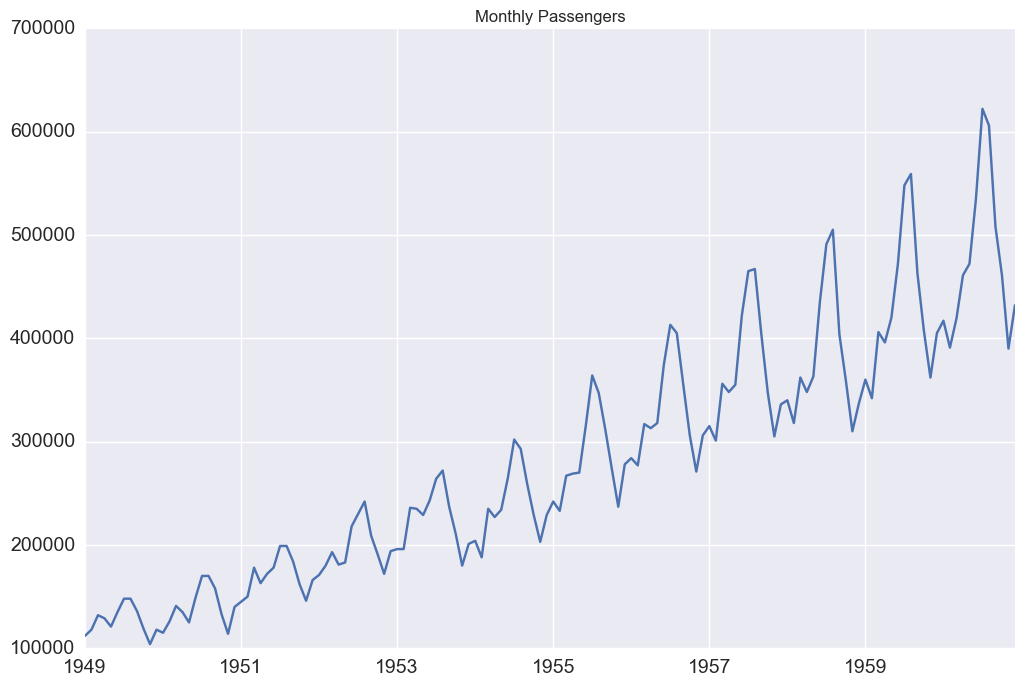

In [21]:
df.AirPassengers.plot(figsize=(12,8), title= 'Monthly Passengers', fontsize=14)
plt.savefig('month_ridership.png', bbox_inches='tight')

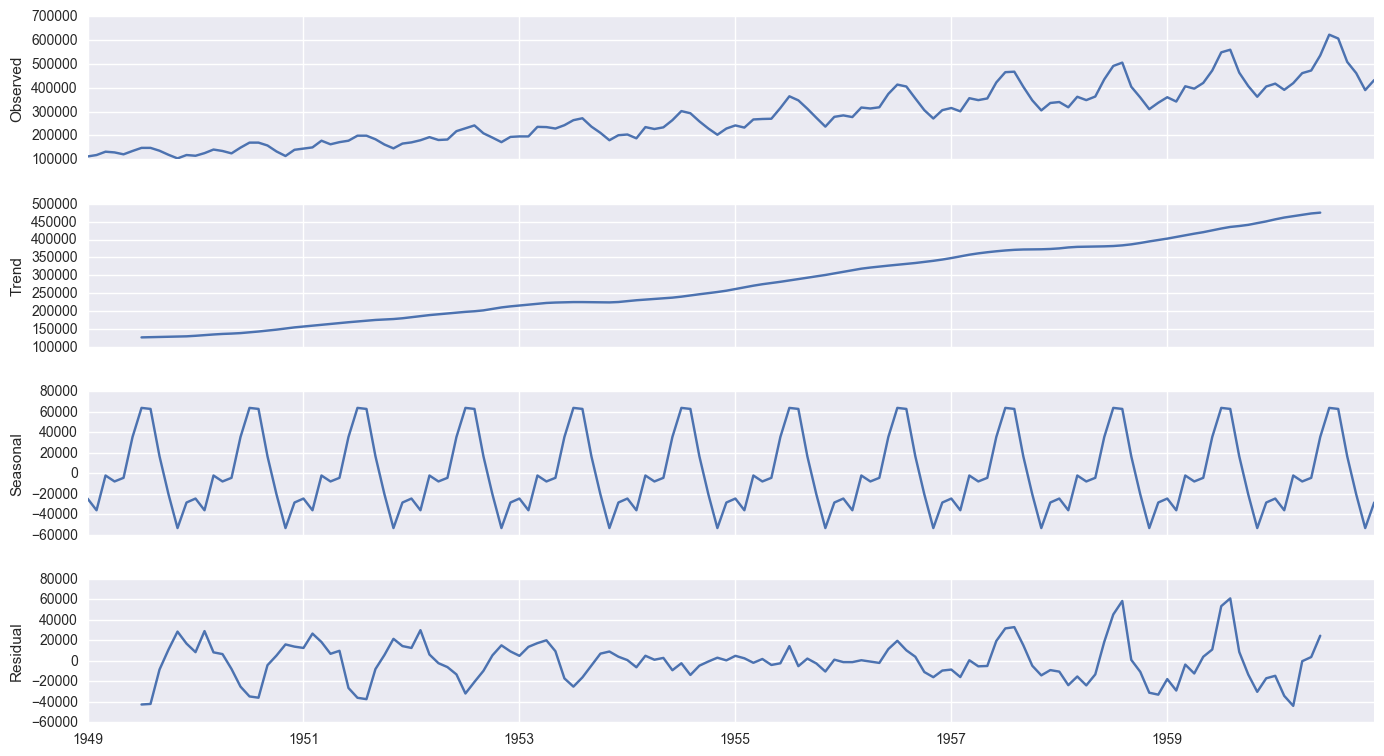

In [22]:
decomposition = seasonal_decompose(df.AirPassengers, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [23]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
print(p)

range(0, 2)


In [24]:
import itertools
import warnings


In [25]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [26]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
y=df

In [28]:
#warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3618.0303991426763
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2824.7439963684233
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2942.2733127230185
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2922.178151133141
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2767.105066400224
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2691.233398643673
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3890.816777796087
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3541.1171286722
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3028.8377323188824
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2746.77973129136
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3583.523640623017
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3531.2937768990187
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2781.198675746594
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2720.7023088205974
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3029.089945668332
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2568.2832251221016
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2841.315781459511
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2815.4011044132576
ARIMA

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2839.809192263449
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2588.50367175184
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2993.4630440139595
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2995.049216326931
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2588.2463284315304
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2592.80110502723
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:3352.0350133621478
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3006.5493366627807
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2810.6423724894516
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2559.584031948852
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2981.2250436794675
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2959.3142304724834
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2579.8245645892207
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2563.13922589258
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:3354.7462930846423
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3006.702997636003
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2809.3844175191666
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2558.484602766447
ARI

In [29]:
from statsmodels.tsa.x13 import x13_arima_select_order


In [30]:
mod = sm.tsa.statespace.SARIMAX(df.AirPassengers, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())


                                 Statespace Model Results                                 
Dep. Variable:                      AirPassengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1413.748
Date:                            Wed, 10 May 2017   AIC                           2837.497
Time:                                    21:37:34   BIC                           2852.346
Sample:                                01-01-1949   HQIC                          2843.531
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1130      0.504     -0.224      0.823      -1.100       0.874
ma.L1         -0.1109      0.490   

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


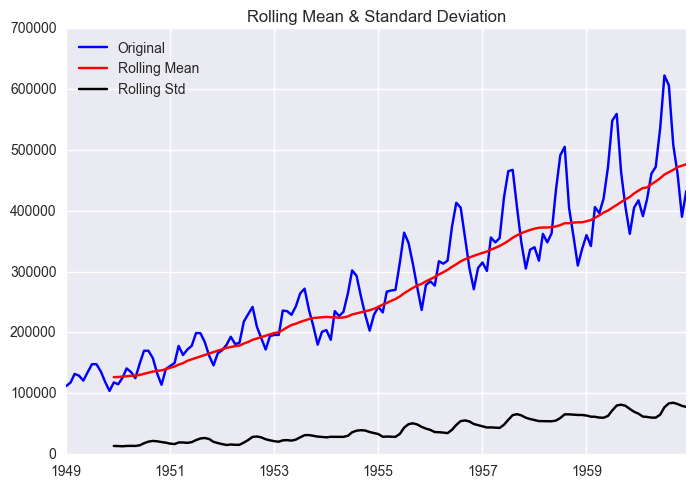

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [32]:
test_stationarity(df.AirPassengers)


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


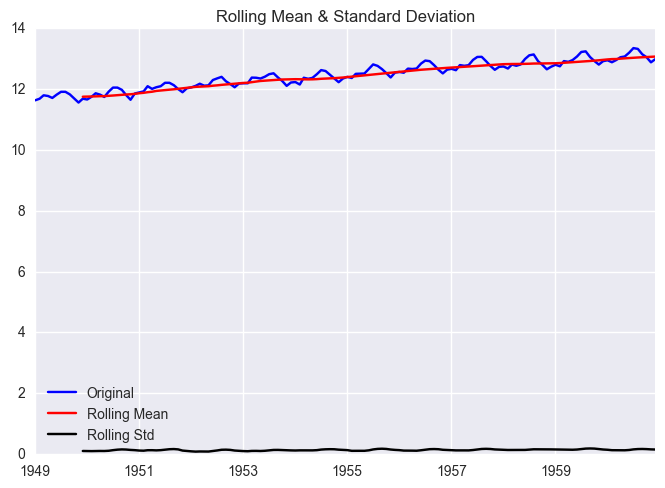

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
df.AirPassengers_log= df.AirPassengers.apply(lambda x: np.log(x))  
test_stationarity(df.AirPassengers_log)